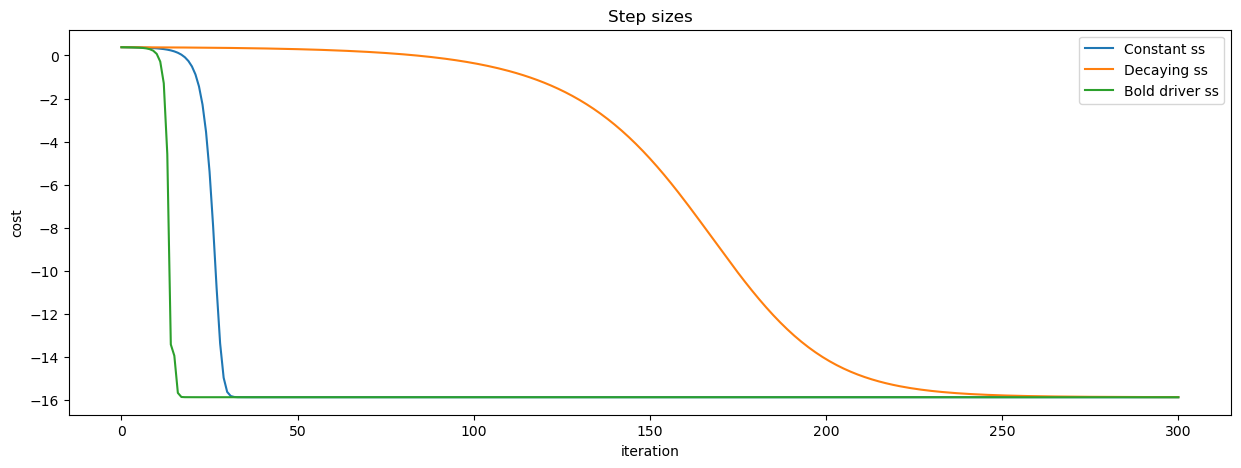

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**2 * np.cos(x) + np.sin(x) - x

def df(x):
    return 2*x*np.cos(x) - x**2*np.sin(x) + np.cos(x) - 1

# Gradient Descent
def gradient_descent(df, x_init, gamma, max_iters, step_size_strategy, alpha0=0.01, k=0.02):
    x = x_init
    history = [f(x)]

    for t in range(max_iters):
        gradient = df(x)
        
        if step_size_strategy == "constant":
            pass  # Use gamma as is
        elif step_size_strategy == "decaying":
            gamma = alpha0 / (1 + k * t)
        elif step_size_strategy == "bold_driver":
            if f(x - gamma * gradient) < f(x):
                gamma = 1.1 * gamma
            else:
                gamma = 0.5 * gamma
        
        x = x - gamma * gradient
        history.append(f(x))
    
    return history,round(x,4),round(f(x),4)

# Parameters
x_init = 1 # Initial guess
gamma = 0.03
max_iters = 300

# Run Gradient Descent for each strategy
history_constant,x1,fvalue1 = gradient_descent(df, x_init, gamma, max_iters, "constant")
history_decaying,x2,fvalue2 = gradient_descent(df, x_init, gamma, max_iters, "decaying")
history_bold_driver,x3,fvalue3 = gradient_descent(df, x_init, gamma, max_iters, "bold_driver")

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(history_constant, label="Constant ss")
plt.plot(history_decaying, label="Decaying ss")
plt.plot(history_bold_driver, label="Bold driver ss")
plt.title('Step sizes')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
# plt.grid(True)
plt.show()

